In [507]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [508]:
print("Loading Iris dataset...")
data = load_iris(return_X_y=True)
print("Iris dataset loaded.")
print("Number of samples: ", len(data[0]))
print("Number of features: ", len(data[0][0]))
print("Number of classes: ", len(np.unique(data[1])))
print("Class labels: ", np.unique(data[1]))


Loading Iris dataset...
Iris dataset loaded.
Number of samples:  150
Number of features:  4
Number of classes:  3
Class labels:  [0 1 2]


In [509]:
X = data[0]
Y = data[1]
data = np.concatenate((X,np.expand_dims(Y,axis=1)),axis=1)
np.random.shuffle(data)

In [510]:
trainData, testData = data[:int(len(data)*0.7),:], data[int(len(data)*0.7):,:] # 70% training, 30% testing
trainData_X, trainData_Y = trainData[:,:-1], trainData[:,-1]
testData_X, testData_Y = testData[:,:-1], testData[:,-1]


In [511]:
from sklearn.metrics.pairwise import euclidean_distances

In [512]:
def knn(trainData_X, trainData_Y, test_sample, k=7):
    dist = np.concatenate(
        (euclidean_distances(trainData_X, np.expand_dims(test_sample,axis=0)),
        np.expand_dims(trainData_Y,axis=1)),
        axis=1
    )
    dist = dist[dist[:,0].argsort()]
    unique_elements, counts_elements = np.unique(dist[:k][:,1], return_counts=True)
    frequency = np.concatenate(
        (np.expand_dims(unique_elements,axis=1),
        np.expand_dims(counts_elements,axis=1)),
        axis=1
    )
    frequency = frequency[frequency[:,1].argsort()]
    pred_label = frequency[0,0]
    return pred_label

knn(trainData_X, trainData_Y, testData_X[0], k=7)

2.0

In [513]:
knn(trainData_X, trainData_Y, testData_X[3], k=110)

2.0

checking accuraacy of iris dataset


[2.0, 0.0, 1.0, 2.0, 0.0, 2.0, 2.0, 0.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0]
32


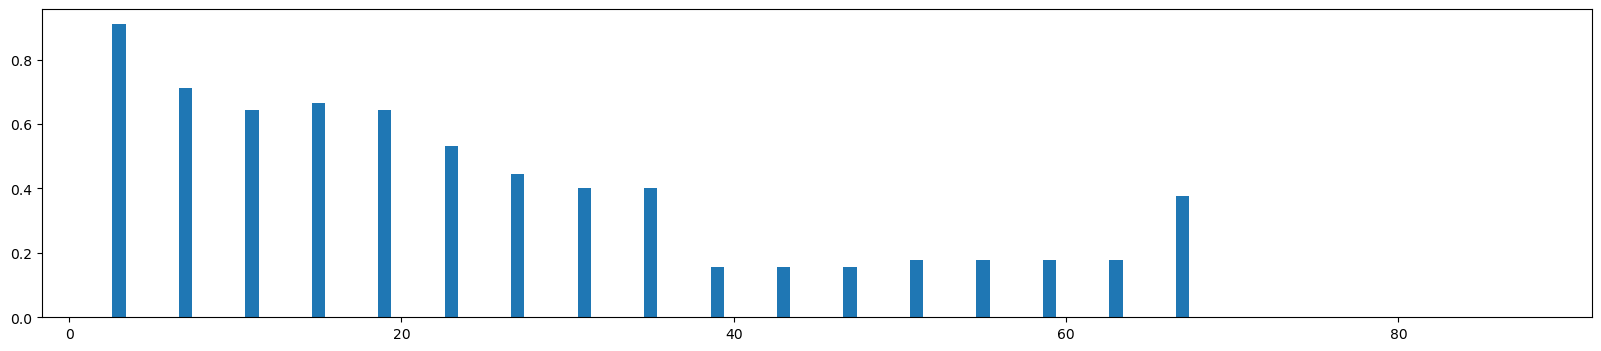

In [514]:
pred_list = [knn(trainData_X, trainData_Y, testData_X[i]) for i in range( testData_X.shape[0])]
print(pred_list)
matchCount = 0
for i in range(len(testData_Y)):
    if testData_Y[i] == pred_list[i]:
        matchCount += 1
print(matchCount)
accuracy_on_k = [np.sum([1 if knn(trainData_X, trainData_Y, testData_X[i],k) == testData_Y[i] else 0
        for i in range(len(testData_X)) ]) / len(testData_X)
        for k in range(3,90,4) ]
plt.figure(figsize=(20,4))
plt.bar(np.arange(3,90,4),accuracy_on_k)
plt.show()

In [515]:
accuracy_on_t_k = np.zeros((9,29))
for t in np.arange(1,10):
    for k in range(1,30):
        trainData, testData = data[:int(t*.1*len(data)),:], data[int(t*.1*len(data)):, :]
        trainData_X, trainData_Y = trainData[:,:-1],trainData[:,-1]
        testData_X, testData_Y = testData[:,:-1],testData[:,-1]
        accuracy_on_t_k[t-1,k-1] = np.sum([1 if knn(trainData_X,trainData_Y,testData_X[i],k=k*3)==testData_Y[i] else 0
                                           for i in range(len(testData_X)) ])/len(testData_X)

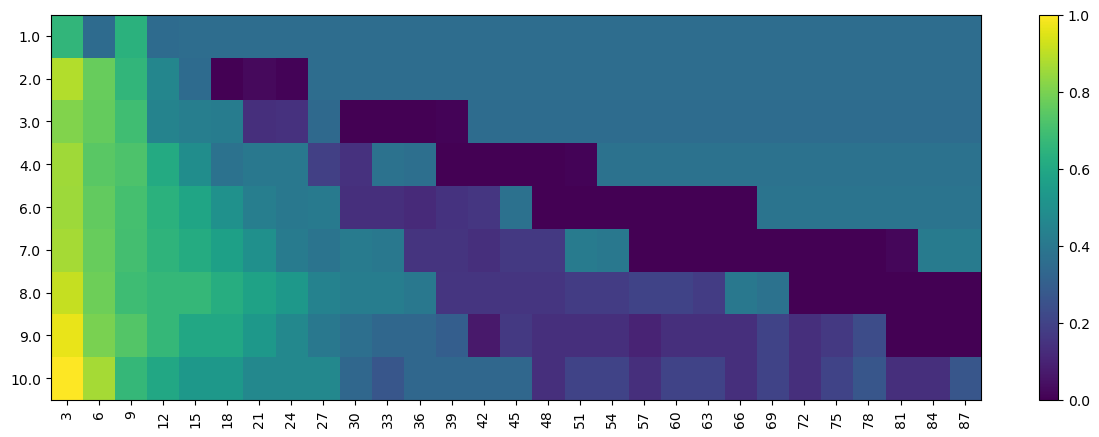

In [516]:
plt.figure(figsize=(15,5))
plt.imshow(accuracy_on_t_k,aspect='auto')
plt.yticks(np.arange(0,9),np.round(np.arange(1,10)*1.1))
plt.xticks(np.arange(0,29),np.arange(1,30)*3,rotation=90)
plt.colorbar()
plt.show()

**Wine Dataset~
**

In [517]:
from sklearn.datasets import load_wine
print('Loading Wine dataset...')
data = load_wine(return_X_y=True)
print('Wine dataset loaded.')
print('Number of samples: ', len(data[0]))
print('Number of features: ', len(data[0][0]))
print('Number of classes: ', len(np.unique(data[1])))
print('Class labels: ', np.unique(data[1]))


Loading Wine dataset...
Wine dataset loaded.
Number of samples:  178
Number of features:  13
Number of classes:  3
Class labels:  [0 1 2]


In [518]:
X = data[0]
Y = data[1]
data = np.concatenate((X,np.expand_dims(Y,axis=1)),axis=1)
np.random.shuffle(data)
trainData, testData = data[:int(len(data)*0.7),:], data[int(len(data)*0.7):,:] # 70% training, 30% testing
trainData_X, trainData_Y = trainData[:,:-1], trainData[:,-1]
testData_X, testData_Y = testData[:,:-1], testData[:,-1]


In [519]:
trainData_X[0], trainData_Y[0]

(array([1.329e+01, 1.970e+00, 2.680e+00, 1.680e+01, 1.020e+02, 3.000e+00,
        3.230e+00, 3.100e-01, 1.660e+00, 6.000e+00, 1.070e+00, 2.840e+00,
        1.270e+03]),
 0.0)

In [520]:
test_sample = testData_X[0]
knn(trainData_X, trainData_Y, test_sample)


1.0

In [521]:
pred_list = [knn(trainData_X, trainData_Y, testData_X[i]) for i in range( testData_X.shape[0])]

In [522]:
print(pred_list)


[1.0, 1.0, 2.0, 0.0, 0.0, 2.0, 0.0, 1.0, 2.0, 1.0, 0.0, 0.0, 0.0, 2.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 2.0, 2.0, 0.0, 1.0, 1.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.0, 2.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0]


In [523]:
matchCount = 0
for i in range(len(testData_Y)):
    if testData_Y[i] == pred_list[i]:
        matchCount += 1
print(matchCount)

28


In [524]:
178*.7

124.6

In [525]:
matchCount/len(testData_Y)

0.5185185185185185

In [526]:
accuracy_on_k = [np.sum([1 if knn(trainData_X, trainData_Y, testData_X[i],k) == testData_Y[i] else 0
        for i in range(len(testData_X)) ]) / len(testData_X)
        for k in range(3,120,4) ]

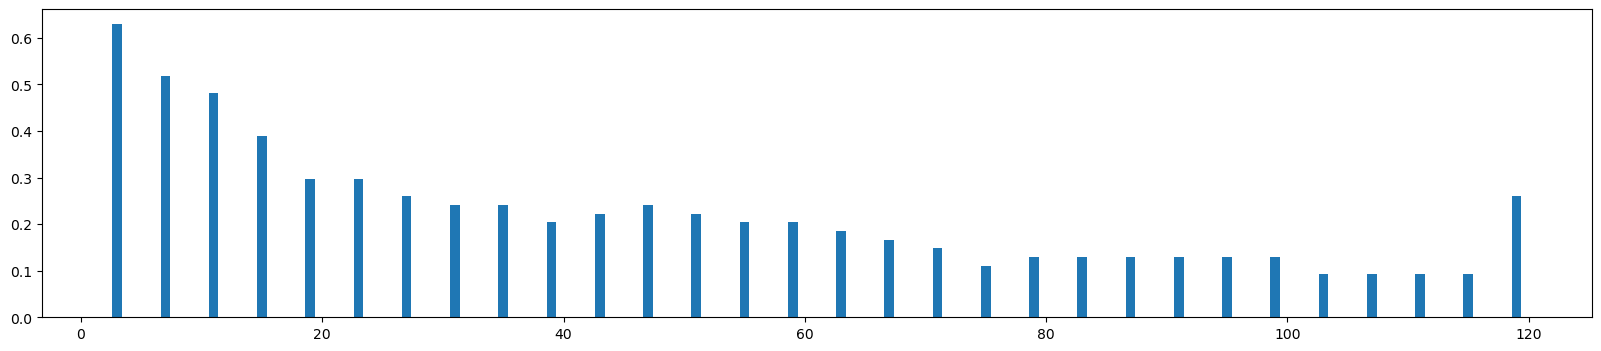

In [527]:
plt.figure(figsize=(20,4))
plt.bar(np.arange(3,120,4),accuracy_on_k)
plt.show()

In [528]:
accuracy_on_t_k = np.zeros((9,29))
for t in np.arange(1,10):
    for k in range(1,30):
        trainData, testData = data[:int(t*.1*len(data)),:], data[int(t*.1*len(data)):, :]
        trainData_X, trainData_Y = trainData[:,:-1],trainData[:,-1]
        testData_X, testData_Y = testData[:,:-1],testData[:,-1]
        accuracy_on_t_k[t-1,k-1] = np.sum([1 if knn(trainData_X,trainData_Y,testData_X[i],k=k*3)==testData_Y[i] else 0
                                           for i in range(len(testData_X)) ])/len(testData_X)

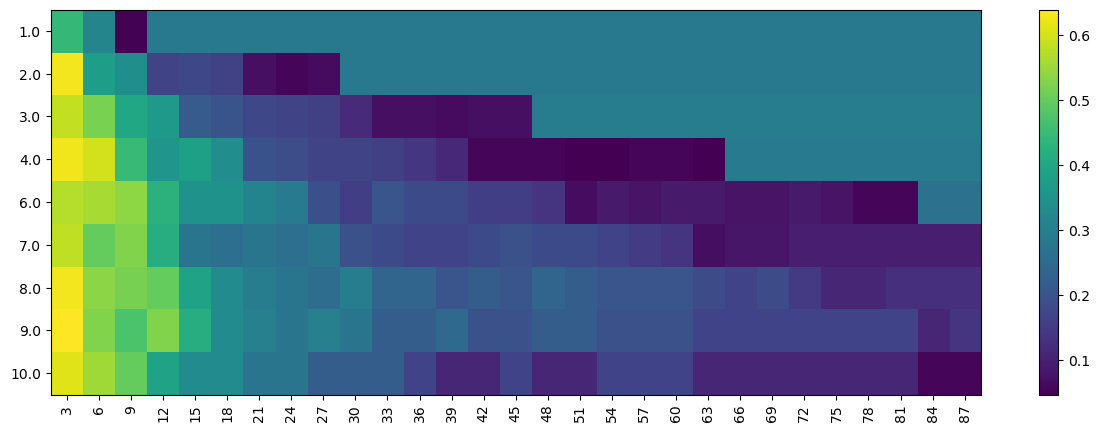

In [529]:
plt.figure(figsize=(15,5))
plt.imshow(accuracy_on_t_k,aspect='auto')
plt.yticks(np.arange(0,9),np.round(np.arange(1,10)*1.1))
plt.xticks(np.arange(0,29),np.arange(1,30)*3,rotation=90)
plt.colorbar()
plt.show()